# Originally Run on Kaggle.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import shutil
import errno
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# data generator
# source from https://medium.com/@ensembledme/writing-custom-keras-generators-fe815d992c5a
from skimage.io import imread

def get_input(path):
    """get specific image from path"""
    img = imread(path)
    return img

def get_output(path, label_file = None):
    """get all the labels relative to the image of path"""
    img_id = path.split('/')[-1]
    labels = label_file.loc[img_id].values
    return labels

def preprocess_input(img):
    # convert between 0 and 1
    return img.astype('float32') / 127.5 -1

def image_generator(files, label_file, batch_size = 32):
    while True:

        batch_paths = np.random.choice(a = files, size = batch_size)
        batch_input = []
        batch_output = []

        for input_path in batch_paths:

            input = get_input(input_path)
            input = preprocess_input(input)
            output = get_output(input_path, label_file = label_file)
            batch_input += [input]
            batch_output += [output]
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output)

        yield batch_x, batch_y

def auto_encoder_generator(files, batch_size = 32):
    while True:
        batch_paths = np.random.choice(a = files, size = batch_size)
        batch_input = []
        batch_output = []

        for input_path in batch_paths:
            input = get_input(input_path)
            input = preprocess_input(input)
            output = input
            batch_input += [input]
            batch_output += [output]
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output)

        yield batch_x, batch_y

In [5]:
import pandas as pd
attr = pd.read_csv('../input/celeba-dataset/list_attr_celeba.csv')
attr = attr.set_index('image_id')

# check if attribute successful loaded
attr.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.000000,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,-0.777728,-0.466039,0.02501,-0.590857,-0.955113,-0.696849,-0.518408,-0.530935,-0.521498,-0.704016,...,-0.886979,-0.035839,-0.583196,-0.360866,-0.62215,-0.903079,-0.055129,-0.754066,-0.854570,0.547234
std,0.628602,0.884766,0.99969,0.806778,0.296241,0.717219,0.855135,0.847414,0.853255,0.710186,...,0.461811,0.999360,0.812333,0.932620,0.78290,0.429475,0.998482,0.656800,0.519338,0.836982
min,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
50%,-1.000000,-1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
75%,-1.000000,1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,1.000000,-1.00000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
IMG_NAME_LENGTH = 6
file_path = "../input/celeba-dataset/img_align_celeba/img_align_celeba/"
img_id = np.arange(1,len(attr.index)+1)
img_path = []
for i in range(len(img_id)):
    img_path.append(file_path + (IMG_NAME_LENGTH - len(str(img_id[i])))*'0' + str(img_id[i]) + '.jpg')
# pick 80% as training set and 20% as validation set
train_path = img_path[:int((0.8)*len(img_path))]
val_path = img_path[int((0.8)*len(img_path)):]
train_generator = auto_encoder_generator(train_path,32)
val_generator = auto_encoder_generator(val_path,32)

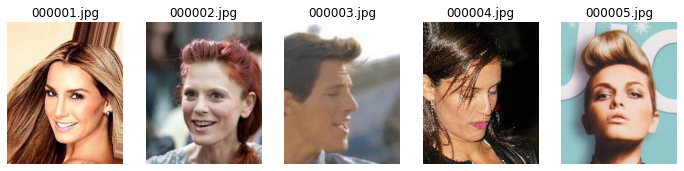

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [7]:
fig, ax = plt.subplots(1, 5, figsize=(12, 4))
for i in range(5):    
    ax[i].imshow(get_input(img_path[i]))
    ax[i].axis('off')
    ax[i].set_title(img_path[i][-10:])
plt.show()
    
attr.iloc[:5]

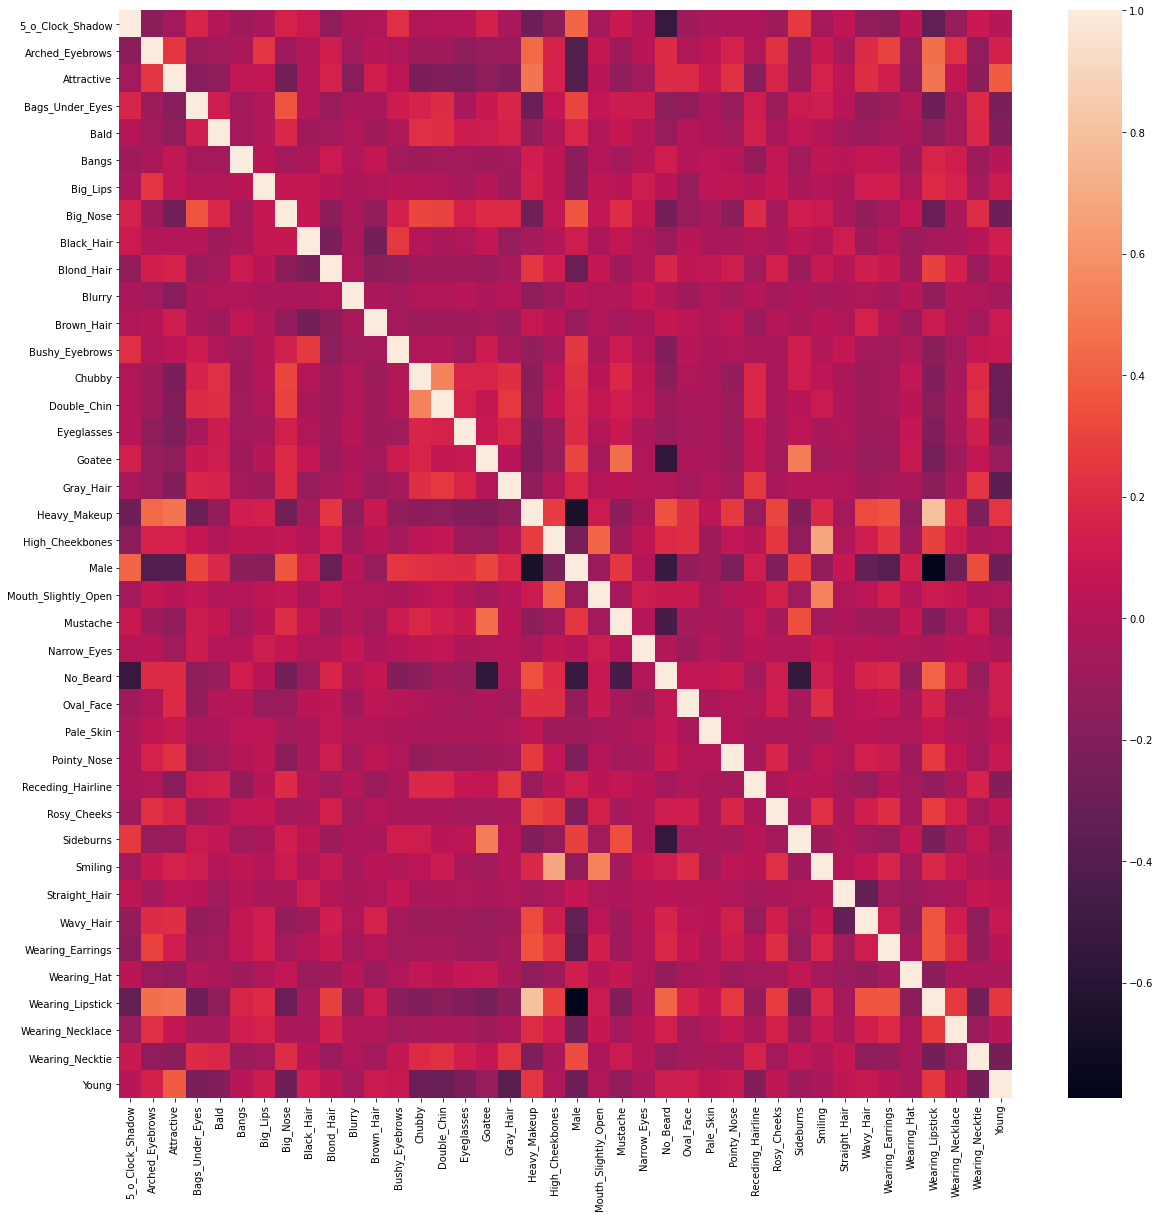

In [8]:
plt.figure(figsize = (20,20))
sns.heatmap(attr.corr())

# Initial Assessment of Dataset
So being male has no correlation with being attractive - fair enough <br>
Surprising Bangs and Bald are correlated - <br>
Wait what!! <br>
Anyways,

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Input, Reshape, UpSampling2D, InputLayer, Lambda, ZeroPadding2D, Cropping2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse, binary_crossentropy

In [10]:
img_sample=get_input(img_path[0])

### Due to improper config of tensorflow and keras
### had to combine the cells to run in a single session.
### Refer to commit 4 to see the code in seperate cells

encoder summary:
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 218, 178, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 218, 178, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 218, 178, 32) 128         conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 109, 89, 32)  0           batch_normalization_20[0][0]     
___________________________________________________________________________

Epoch 1/7
4000/4000 [==============================] - 844s 211ms/step - batch: 1999.5000 - size: 32.0000 - loss: 0.0946 - val_loss: 0.0763
Epoch 2/7
4000/4000 [==============================] - 853s 213ms/step - batch: 1999.5000 - size: 32.0000 - loss: 0.0736 - val_loss: 0.0709
Epoch 3/7
4000/4000 [==============================] - 858s 215ms/step - batch: 1999.5000 - size: 32.0000 - loss: 0.0695 - val_loss: 0.0688
Epoch 4/7
4000/4000 [==============================] - 864s 216ms/step - batch: 1999.5000 - size: 32.0000 - loss: 0.0666 - val_loss: 0.0680
Epoch 5/7
4000/4000 [==============================] - 867s 217ms/step - batch: 1999.5000 - size: 32.0000 - loss: 0.0646 - val_loss: 0.0682
Epoch 6/7
4000/4000 [==============================] - 864s 216ms/step - batch: 1999.5000 - size: 32.0000 - loss: 0.0632 - val_loss: 0.0696
Epoch 7/7
4000/4000 [==============================] - 860s 215ms/step - batch: 1999.5000 - size: 32.0000 - loss: 0.0620 - val_loss: 0.0689


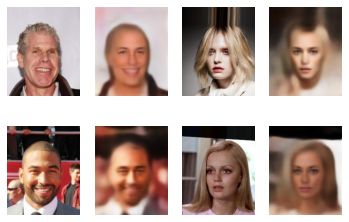

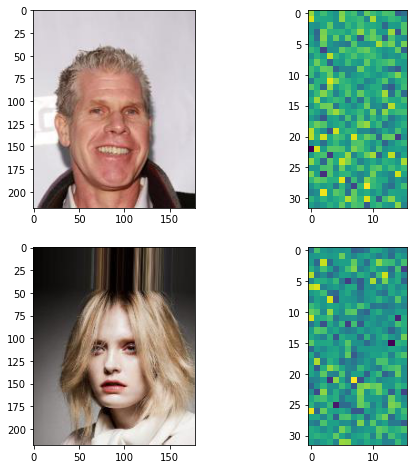

In [ ]:
import tensorflow as tf
import random
#tf.config.run_eagerly(True)
with tf.compat.v1.Session() as sess:
    b_size = 128
    n_size = 512
    def sampling(args):
        z_mean, z_log_sigma = args
        epsilon = K.random_normal(shape = (n_size,) , mean = 0, stddev = 1)
        return z_mean + K.exp(z_log_sigma/2) * epsilon
  
    def build_conv_vae(input_shape, bottleneck_size, sampling, batch_size = 32):
    
        # ENCODER
        input = Input(shape=(input_shape[0],input_shape[1],input_shape[2]))
        x = Conv2D(32,(3,3),activation = 'relu', padding = 'same')(input)    
        x = BatchNormalization()(x)
        x = MaxPooling2D((2,2), padding ='same')(x)
        x = Conv2D(64,(3,3),activation = 'relu', padding = 'same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2,2), padding ='same')(x)
        x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2,2), padding ='same')(x)
        x = Conv2D(256,(3,3), activation = 'relu', padding = 'same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2,2), padding ='same')(x)
    
        # Latent Variable Calculation
        shape = K.int_shape(x)
        flatten_1 = Flatten()(x)
        dense_1 = Dense(bottleneck_size, name='z_mean')(flatten_1)
        z_mean = BatchNormalization()(dense_1)
        flatten_2 = Flatten()(x)
        dense_2 = Dense(bottleneck_size, name ='z_log_sigma')(flatten_2)
        z_log_sigma = BatchNormalization()(dense_2)
        z = Lambda(sampling)([z_mean, z_log_sigma])
        encoder = Model(input, [z_mean, z_log_sigma, z], name = 'encoder')
    
        # DECODER
        latent_input = Input(shape=(bottleneck_size,), name = 'decoder_input')
        x = Dense(shape[1]*shape[2]*shape[3])(latent_input)
        x = Reshape((shape[1],shape[2],shape[3]))(x)
        x = UpSampling2D((2,2))(x)
        x = Cropping2D([[0,0],[0,1]])(x)
        x = Conv2DTranspose(256,(3,3), activation = 'relu', padding = 'same')(x)
        x = BatchNormalization()(x)
        x = UpSampling2D((2,2))(x)
        x = Cropping2D([[0,1],[0,1]])(x)
        x = Conv2DTranspose(128,(3,3), activation = 'relu', padding = 'same')(x)
        x = BatchNormalization()(x)
        x = UpSampling2D((2,2))(x)
        x = Cropping2D([[0,1],[0,1]])(x)
        x = Conv2DTranspose(64,(3,3), activation = 'relu', padding = 'same')(x)
        x = BatchNormalization()(x)
        x = UpSampling2D((2,2))(x)
        x = Conv2DTranspose(32,(3,3), activation = 'relu', padding = 'same')(x)
        x = BatchNormalization()(x)
        output = Conv2DTranspose(3,(3,3), activation = 'tanh', padding ='same')(x)
        decoder = Model(latent_input, output, name = 'decoder')

        output_2 = decoder(encoder(input)[2])
        vae = Model(input, output_2, name ='vae')
        return vae, encoder, decoder, z_mean, z_log_sigma

    vae_2, encoder, decoder, z_mean, z_log_sigma = build_conv_vae(img_sample.shape, n_size, sampling, batch_size = b_size)
    print("encoder summary:")
    encoder.summary()
    print("decoder summary:")
    decoder.summary()
    print("vae summary:")
    vae_2.summary()
    
    def vae_loss(input_img, output):
        # Compute error in reconstruction
        reconstruction_loss = mse(K.flatten(input_img) , K.flatten(output))
    
        # Compute the KL Divergence regularization term
        kl_loss = - 0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis = -1)
    
        # Return the average loss over all images in batch
        total_loss = (reconstruction_loss + 0.0001 * kl_loss)    
        return total_loss
    vae_2.compile(optimizer='rmsprop', loss= vae_loss)
    encoder.compile(optimizer = 'rmsprop', loss = vae_loss)
    decoder.compile(optimizer = 'rmsprop', loss = vae_loss)
    vae_2.fit_generator(train_generator, steps_per_epoch = 4000, validation_data = val_generator, epochs=7, validation_steps= 500)
    
    
    x_test = []
    for i in range(64):
        x_test.append(get_input(img_path[random.randint(0,len(img_id))]))
    x_test = np.array(x_test)
    figure_Decoded = vae_2.predict(x_test.astype('float32')/127.5 -1, batch_size = b_size)
    figure_original = x_test[0]
    figure_decoded = (figure_Decoded[0]+1)/2
    for i in range(4):
        plt.axis('off')
        plt.subplot(2,4,1+i*2)
        plt.imshow(x_test[i])
        plt.axis('off')
        plt.subplot(2,4,2 + i*2)
        plt.imshow((figure_Decoded[i]+1)/2)
        plt.axis('off')
    plt.show()
    
    # Choose two images of different attributes, and plot the original and latent space of it
    
    x_test1 = []
    for i in range(64):
        x_test1.append(get_input(img_path[np.random.randint(0,len(img_id))]))
    x_test1 = np.array(x_test)
    x_test_encoded = np.array(encoder.predict(x_test1/127.5-1, batch_size = b_size))
    figure_original_1 = x_test[0]
    figure_original_2 = x_test[1]
    Encoded1 = (x_test_encoded[0,0,:].reshape(32, 16,)+1)/2 
    Encoded2 = (x_test_encoded[0,1,:].reshape(32, 16)+1)/2
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2,2,1)
    plt.imshow(figure_original_1)
    plt.subplot(2,2,2)
    plt.imshow(Encoded1)
    plt.subplot(2,2,3)
    plt.imshow(figure_original_2)
    plt.subplot(2,2,4)
    plt.imshow(Encoded2)
    filename = 'Fig_001.png'
    plt.savefig(filename)
    plt.show()
    plt.close()
    # Randomly generated 15 images from 15 series of noise information
    n = 3
    m = 5
    digit_size1 = 218
    digit_size2 = 178
    figure = np.zeros((digit_size1 * n, digit_size2 * m,3))
     
    for i in range(3):
        for j in range(5):
            z_sample = np.random.rand(1,512)
            x_decoded = decoder.predict([z_sample])
            figure[i * digit_size1: (i + 1) * digit_size1,
                   j * digit_size2: (j + 1) * digit_size2,:] = (x_decoded[0]+1)/2 
    plt.figure(figsize=(10, 10))
    plt.imshow(figure)
    filename = 'Fig_002.png'
    plt.savefig(filename)
    plt.show()
    plt.close()